In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
from gensim.models import Word2Vec
import logging
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
StopWords = set(stopwords.words('english'))
porter = PorterStemmer()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
StopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
def preprocessing(text):
    text = re.sub(r"[{}]+".format(punctuation), '', text)
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in StopWords and re.match(r'^(-?\d+)(\.\d+)?$', token) == None and len(token) > 2]
    return ' '.join(filtered_tokens)

In [7]:
def top_tfidf_feats(row, terms, top_n=25):
    top_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [terms[i] for i in top_ids]
    return top_feats

In [8]:
def extract_tfidf_keywords(texts, top_n=25):
    tokenzier = word_tokenize
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000000,
                                       min_df=0, stop_words="english",
                                       use_idf=True, tokenizer=tokenzier, ngram_range=(1, 1))
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    terms = tfidf_vectorizer.get_feature_names()
    arr = []
    for i in range(0, tfidf_matrix.shape[0]):
        row = np.squeeze(tfidf_matrix[i].toarray())
        feats = top_tfidf_feats(row, terms, top_n)
        arr.append(feats)
    return arr

In [13]:
import nltk
nltk.download('punkt')
Raw = [line.strip('\n') for line in open('L:\\09052020Topic 2 Dataset\\1.Raw Input.txt').readlines()]
Cleaned_Corpus = [preprocessing(line) for line in Raw]
TF_Words = extract_tfidf_keywords(Cleaned_Corpus, 20)

In [19]:
TF_Words

[['hombre',
  'proyecto',
  'addictions',
  'work',
  'years',
  'programs',
  'people',
  'asturias',
  'volunteering',
  'commendable',
  'centered',
  'latin',
  'methodologies',
  'america',
  'lot',
  'reviews',
  'incorporation',
  'europe',
  'addressing',
  'prevention'],
 ['alcohol',
  'consumption',
  'familiar',
  'adolescents',
  'history',
  'audit',
  'family',
  'relationship',
  'healthy',
  'nursing',
  'carmen',
  'rs164',
  'campeche',
  'ciudad',
  'teens',
  'correlationaldescriptive',
  'teenagers',
  'teen',
  'unhealthy',
  'lifestyles'],
 ['insomnia',
  'almazora',
  'patients',
  'sleep',
  'nondrug',
  'abucasis',
  'town',
  'treatment',
  'therapeutic',
  'diagnosed',
  'care',
  'andor',
  'pattern',
  'center',
  'diagnosis',
  'therapy',
  'medical',
  'nursing',
  'approach',
  'receiveddrug'],
 ['dysphagia',
  'stroke',
  'prevalence',
  'patients',
  'mecvv',
  'acute',
  'thickener',
  'icred',
  'frequentist',
  'hygienicdietary',
  'barthel',
  'vo

In [21]:
model = Word2Vec([word_tokenize(line) for line in Cleaned_Corpus], size=100, window=5, min_count=1, workers=4)
doc_vec = []
for f in TF_Words:
    doc_vec.append(np.mean(model[f], axis=0))
X = pd.DataFrame(doc_vec)
X.to_excel('C:\\Users\\Owen\\Desktop\\4470 TF-IDF Filtered Version.xlsx')

2020-05-10 01:07:00,512 : INFO : collecting all words and their counts
2020-05-10 01:07:00,513 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-10 01:07:00,580 : INFO : collected 44910 word types from a corpus of 528135 raw words and 4770 sentences
2020-05-10 01:07:00,580 : INFO : Loading a fresh vocabulary
2020-05-10 01:07:00,668 : INFO : effective_min_count=1 retains 44910 unique words (100% of original 44910, drops 0)
2020-05-10 01:07:00,669 : INFO : effective_min_count=1 leaves 528135 word corpus (100% of original 528135, drops 0)
2020-05-10 01:07:00,755 : INFO : deleting the raw counts dictionary of 44910 items
2020-05-10 01:07:00,756 : INFO : sample=0.001 downsamples 12 most-common words
2020-05-10 01:07:00,756 : INFO : downsampling leaves estimated 525098 word corpus (99.4% of prior 528135)
2020-05-10 01:07:00,827 : INFO : estimated required memory for 44910 words and 100 dimensions: 58383000 bytes
2020-05-10 01:07:00,827 : INFO : resetting laye

In [22]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.307480,0.027683,0.126264,0.014597,-0.104541,0.181759,0.188842,0.129183,-0.281793,0.183166,...,-0.051543,-0.256356,0.038554,-0.294907,0.044983,0.160555,-0.110850,-0.159060,-0.028468,0.210194
1,0.341667,0.040606,0.136095,0.014739,-0.117427,0.213244,0.197171,0.156784,-0.319954,0.198302,...,-0.058007,-0.289189,0.035876,-0.329743,0.049068,0.172852,-0.118198,-0.178658,-0.034390,0.228512
2,0.556450,0.062172,0.205021,0.000568,-0.208824,0.346598,0.326662,0.262392,-0.532750,0.332588,...,-0.099944,-0.478003,0.056502,-0.564958,0.086465,0.302051,-0.199775,-0.309904,-0.040996,0.367041
3,0.245885,0.041222,0.064781,-0.010177,-0.102966,0.170579,0.124018,0.173229,-0.271533,0.138314,...,-0.050326,-0.231127,0.008251,-0.286712,0.040156,0.138339,-0.081803,-0.156936,-0.013067,0.149009
4,0.328632,0.044574,0.122025,0.002811,-0.119706,0.206031,0.189136,0.153066,-0.310821,0.192286,...,-0.060127,-0.278339,0.028410,-0.326670,0.055265,0.171888,-0.118428,-0.175006,-0.027705,0.223157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,0.277561,0.007019,0.130132,0.050485,-0.074386,0.137998,0.189845,0.021668,-0.209281,0.187923,...,-0.038124,-0.220470,0.040009,-0.203074,0.039522,0.110495,-0.108140,-0.103978,-0.042206,0.236464
4766,0.470111,0.033844,0.169121,0.078847,-0.139374,0.245644,0.286917,0.123681,-0.401264,0.300383,...,-0.069130,-0.394987,0.043298,-0.371278,0.067698,0.190569,-0.170134,-0.198673,-0.070310,0.359700
4767,0.617575,0.073962,0.166939,0.078844,-0.203625,0.353044,0.326467,0.292732,-0.605280,0.368224,...,-0.094043,-0.556934,0.017972,-0.532414,0.104611,0.247372,-0.197011,-0.306959,-0.078261,0.413502
4768,0.498987,0.010433,0.218055,0.080597,-0.147865,0.257801,0.333650,0.082552,-0.405049,0.327217,...,-0.064571,-0.414845,0.066725,-0.401093,0.075839,0.209904,-0.192404,-0.209150,-0.069036,0.404261


In [79]:
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000)
digits_proj = tsne.fit_transform(X)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4770 samples in 0.074s...
[t-SNE] Computed neighbors for 4770 samples in 0.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4770
[t-SNE] Computed conditional probabilities for sample 2000 / 4770
[t-SNE] Computed conditional probabilities for sample 3000 / 4770
[t-SNE] Computed conditional probabilities for sample 4000 / 4770
[t-SNE] Computed conditional probabilities for sample 4770 / 4770
[t-SNE] Mean sigma: 0.017543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.759476
[t-SNE] KL divergence after 1000 iterations: 1.242234


In [80]:
digits_proj

array([[ 77.00114  ,  56.32584  ],
       [ 44.749973 ,  80.783676 ],
       [ 13.877589 , -71.53511  ],
       ...,
       [-24.305004 , -52.901684 ],
       [ -1.3813334, -78.669174 ],
       [-49.94606  ,  80.87333  ]], dtype=float32)

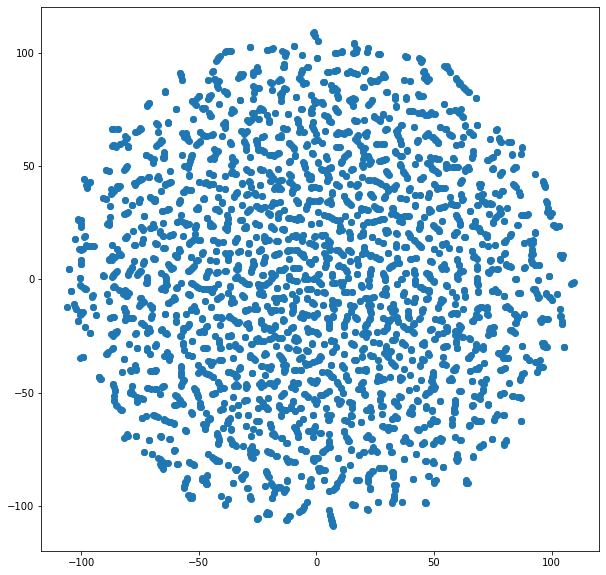

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(digits_proj[:,0], digits_proj[:,1])
plt.show()


In [71]:
#MeanShift
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
print(bandwidth)
# 计算mean shift向量并进行聚类
ms = MeanShift(bandwidth=0.2, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

0.5451909293554936
number of estimated clusters : 1


In [72]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 4770}

In [64]:
#DBSCAN
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
#X = matrix_array
db = DBSCAN(eps=0.1, min_samples=5).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [65]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 1187,
 0: 3409,
 1: 8,
 2: 6,
 3: 5,
 4: 7,
 5: 7,
 6: 16,
 7: 5,
 8: 9,
 9: 8,
 10: 5,
 11: 6,
 12: 5,
 13: 7,
 14: 5,
 15: 23,
 16: 18,
 17: 7,
 18: 5,
 19: 5,
 20: 5,
 21: 7,
 22: 5}

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4770 samples in 0.087s...
[t-SNE] Computed neighbors for 4770 samples in 0.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4770
[t-SNE] Computed conditional probabilities for sample 2000 / 4770
[t-SNE] Computed conditional probabilities for sample 3000 / 4770
[t-SNE] Computed conditional probabilities for sample 4000 / 4770
[t-SNE] Computed conditional probabilities for sample 4770 / 4770
[t-SNE] Mean sigma: 0.017543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.021317
[t-SNE] KL divergence after 1000 iterations: 1.247776
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4770 samples in 0.074s...
[t-SNE] Computed neighbors for 4770 samples in 0.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4770
[t-SNE] Computed conditional probabilities for sample 2000 / 4770
[t-SNE] Computed conditional probabilities for sample 3000 / 4770
[t-SNE] Computed conditional pr

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4770 samples in 0.076s...
[t-SNE] Computed neighbors for 4770 samples in 0.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4770
[t-SNE] Computed conditional probabilities for sample 2000 / 4770
[t-SNE] Computed conditional probabilities for sample 3000 / 4770
[t-SNE] Computed conditional probabilities for sample 4000 / 4770
[t-SNE] Computed conditional probabilities for sample 4770 / 4770
[t-SNE] Mean sigma: 0.017543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.844208
[t-SNE] KL divergence after 1000 iterations: 1.241324


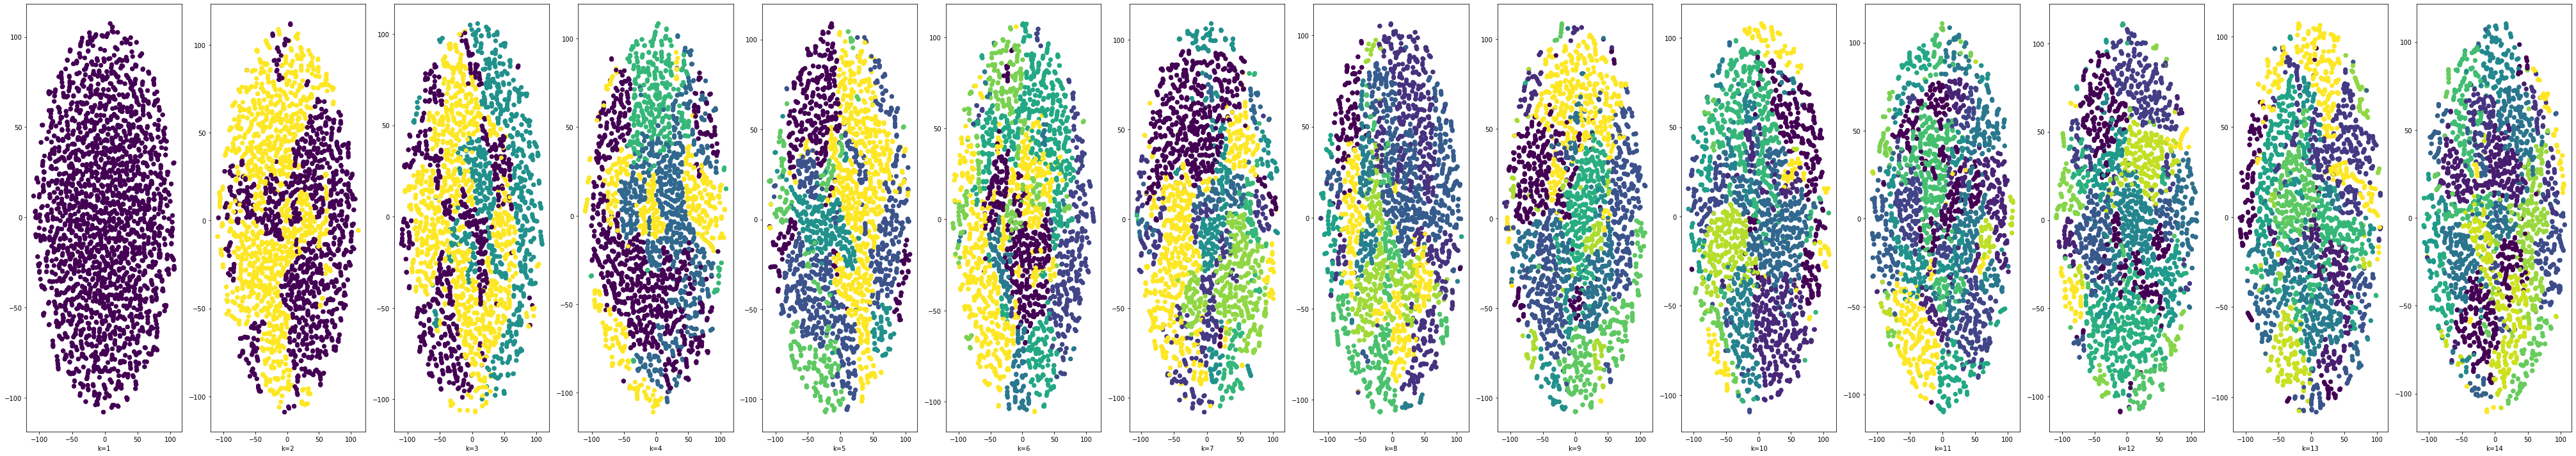

In [86]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000)
plt.figure(figsize=(60,10))
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(X)
    plt.subplot(1,15,k)              #subplot( numRows, numCols,  plotNum)
    
    digits_proj = tsne.fit_transform(X)
    plt.scatter(digits_proj[:,0], digits_proj[:,1], c=a)
    #plt.scatter(x[:, 0], x[:, 1], c=a)
    plt.xlabel('k='+str(k))
plt.tight_layout()
plt.show()

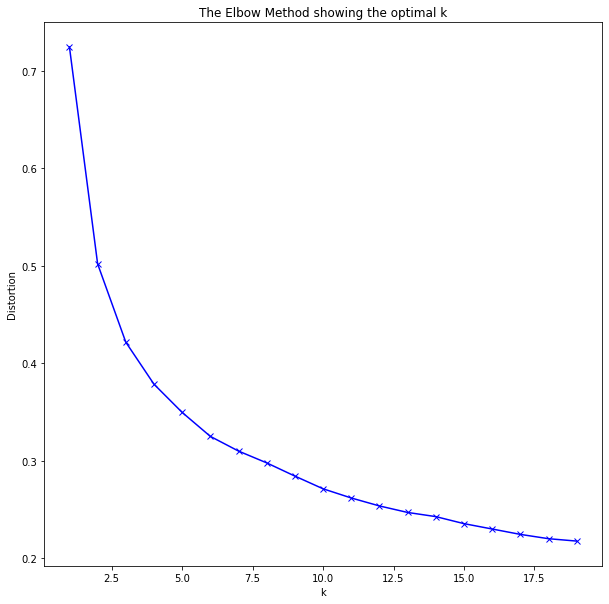

In [84]:
#elbow method
from sklearn import metrics
from scipy.spatial.distance import cdist

#plt.plot()
#X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.figure(figsize=(10,10))
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
def compute_inertia(a, x):
    W = [np.mean(pairwise_distances(x[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=20, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    x = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(x)
            local_inertia.append(compute_inertia(assignments, x))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

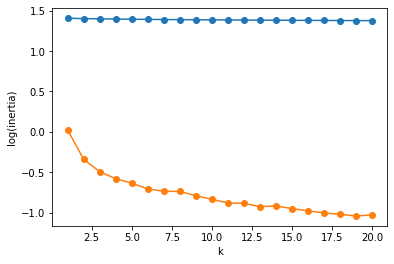

In [92]:
matrix_array=X.to_numpy()
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(),matrix_array)


plt.plot(range(1, 20+1), reference_inertia,
         '-o', label='abc')
plt.plot(range(1, 20+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4770 samples in 0.086s...
[t-SNE] Computed neighbors for 4770 samples in 0.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4770
[t-SNE] Computed conditional probabilities for sample 2000 / 4770
[t-SNE] Computed conditional probabilities for sample 3000 / 4770
[t-SNE] Computed conditional probabilities for sample 4000 / 4770
[t-SNE] Computed conditional probabilities for sample 4770 / 4770
[t-SNE] Mean sigma: 0.017543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.497841
[t-SNE] KL divergence after 1000 iterations: 1.233141


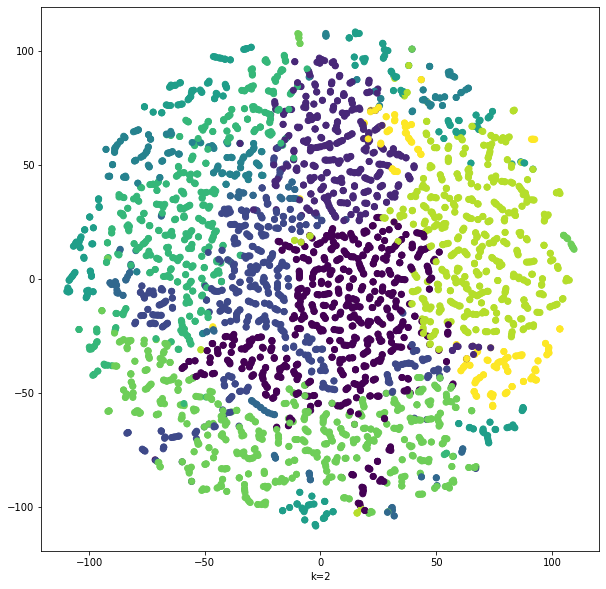

In [117]:
plt.figure(figsize=(10, 10))
#for k in range(1,13):
kmeans = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=300, algorithm='auto')
a = kmeans.fit_predict(X)
#    plt.subplot(1,13,k)              #subplot( numRows, numCols,  plotNum)
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000)
digits_proj = tsne.fit_transform(X)
plt.scatter(digits_proj[:,0], digits_proj[:,1], c=a)
plt.xlabel('k='+str(2))
#plt.tight_layout()
plt.show()

In [118]:
a[:50]

array([0, 0, 4, 8, 0, 6, 7, 7, 0, 4, 4, 4, 0, 7, 6, 8, 6, 6, 6, 7, 0, 6,
       8, 2, 7, 8, 0, 4, 6, 4, 8, 4, 8, 4, 0, 6, 6, 8, 4, 6, 7, 7, 9, 6,
       4, 4, 6, 7, 6, 6])

In [156]:
import numpy
def jc(result, reference):
    """
    Jaccard coefficient
    
    Computes the Jaccard coefficient between the binary objects in two images.
    
    Parameters
    ----------
    result: array_like
            Input data containing objects. Can be any type but will be converted
            into binary: background where 0, object everywhere else.
    reference: array_like
            Input data containing objects. Can be any type but will be converted
            into binary: background where 0, object everywhere else.
    Returns
    -------
    jc: float
        The Jaccard coefficient between the object(s) in `result` and the
        object(s) in `reference`. It ranges from 0 (no overlap) to 1 (perfect overlap).
    
    Notes
    -----
    This is a real metric. The binary images can therefore be supplied in any order.
    """
    result = numpy.atleast_1d(result.astype(numpy.bool))
    reference = numpy.atleast_1d(reference.astype(numpy.bool))
    
    intersection = numpy.count_nonzero(result & reference)
    union = numpy.count_nonzero(result | reference)
    
    jc = float(intersection) / float(union)
    
    return jc


In [125]:
True_cluster= pd.read_excel('L:\\09052020Topic 2 Dataset\\5.True Label (Ground Truth).xlsx',header=None)

In [137]:
True_cluster_arr=True_cluster.to_numpy()
True_cluster_arr=np.squeeze(True_cluster_arr)

In [136]:
a.shape

(4770,)

In [138]:
True_cluster_arr.shape

(4770,)

In [141]:
True_cluster_arr

array([8, 8, 8, ..., 0, 0, 0], dtype=int64)

In [157]:
#keman k=10
jc(a , True_cluster_arr)

0.7437821612349914